In [34]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 64
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28



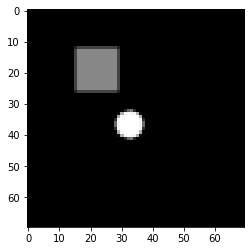

0


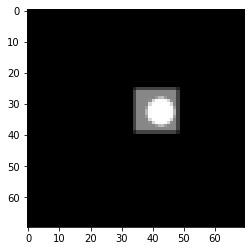

1


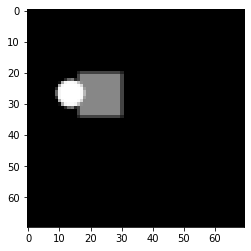

2


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 787.35it/s]


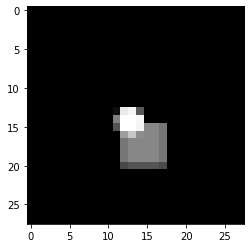

In [36]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense



trainxs = []
trainximgs = []
trainys = []

DATADIR = r"C:\Users\colly\Desktop\Toyimagesv3"

CATEGORIES = ["out_squarev2", "in_squarev2", "on_linev2"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.bitwise_not(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(class_num)
          # we just want one for now so break
        break


for category in CATEGORIES:  

    path = os.path.join(DATADIR,category)  
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=notinsquare 1=insquare

    for img in tqdm(os.listdir(path)):  # iterate over each image per point value
        ig_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array 
        ig_array = cv2.bitwise_not(ig_array)
        img_array = cv2.resize(ig_array, (28,28))
        new_img_array = rotate(img_array, 90)
        new_img_array1 = rotate(img_array, 180)
        new_img_array2 = rotate(img_array, 270)

        trainys.append(class_num)
        trainys.append(class_num)
        trainys.append(class_num)
        trainys.append(class_num)
        trainxs.append(new_img_array)
        trainxs.append(new_img_array1)
        trainxs.append(new_img_array2)
        trainxs.append(img_array)
    plt.imshow(img_array, cmap='gray')
            



In [37]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

trainxs1 = np.asarray(trainxs, dtype=np.float32)
trainys1 = np.asarray(trainys, dtype=np.float32)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(trainxs1, trainys1, test_size=0.2, random_state=42)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape)
print(y_train.shape)

(9600, 28, 28)
(9600, 3)


In [38]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train.shape

(9600, 28, 28, 1)

In [39]:

print('x_train shape:', x_train.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = np.array(x_train)
x_test = np.array(x_test)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(9, 9),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

x_train shape: (9600, 28, 28, 1)
y_train shape: (9600, 3)
9600 train samples
2400 test samples
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 20, 20, 32)        2624      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 64)        73792     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               401536    
________________________

In [40]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 9600 samples, validate on 2400 samples
Epoch 1/20
9600/9600 [==============================] - ETA: 1:10 - loss: 0.6378 - accuracy: 0.66 - ETA: 49s - loss: 0.6376 - accuracy: 0.6667 - ETA: 42s - loss: 0.6375 - accuracy: 0.666 - ETA: 37s - loss: 0.6377 - accuracy: 0.666 - ETA: 34s - loss: 0.6364 - accuracy: 0.666 - ETA: 33s - loss: 0.6361 - accuracy: 0.666 - ETA: 32s - loss: 0.6369 - accuracy: 0.666 - ETA: 31s - loss: 0.6373 - accuracy: 0.666 - ETA: 31s - loss: 0.6374 - accuracy: 0.666 - ETA: 30s - loss: 0.6373 - accuracy: 0.666 - ETA: 30s - loss: 0.6373 - accuracy: 0.666 - ETA: 31s - loss: 0.6372 - accuracy: 0.666 - ETA: 31s - loss: 0.6371 - accuracy: 0.666 - ETA: 30s - loss: 0.6370 - accuracy: 0.666 - ETA: 30s - loss: 0.6372 - accuracy: 0.666 - ETA: 29s - loss: 0.6371 - accuracy: 0.666 - ETA: 29s - loss: 0.6371 - accuracy: 0.666 - ETA: 28s - loss: 0.6370 - accuracy: 0.666 - ETA: 28s - loss: 0.6371 - accuracy: 0.666 - ETA: 28s - loss: 0.6371 - accuracy: 0.666 - ETA: 29s - loss

9600/9600 [==============================] - ETA: 23s - loss: 0.6329 - accuracy: 0.656 - ETA: 23s - loss: 0.6228 - accuracy: 0.666 - ETA: 23s - loss: 0.6194 - accuracy: 0.666 - ETA: 23s - loss: 0.6153 - accuracy: 0.669 - ETA: 23s - loss: 0.6157 - accuracy: 0.672 - ETA: 23s - loss: 0.6150 - accuracy: 0.672 - ETA: 22s - loss: 0.6139 - accuracy: 0.675 - ETA: 22s - loss: 0.6135 - accuracy: 0.677 - ETA: 22s - loss: 0.6120 - accuracy: 0.677 - ETA: 22s - loss: 0.6155 - accuracy: 0.675 - ETA: 22s - loss: 0.6131 - accuracy: 0.678 - ETA: 22s - loss: 0.6136 - accuracy: 0.678 - ETA: 22s - loss: 0.6146 - accuracy: 0.677 - ETA: 22s - loss: 0.6144 - accuracy: 0.678 - ETA: 21s - loss: 0.6154 - accuracy: 0.676 - ETA: 21s - loss: 0.6143 - accuracy: 0.678 - ETA: 21s - loss: 0.6131 - accuracy: 0.679 - ETA: 21s - loss: 0.6125 - accuracy: 0.681 - ETA: 21s - loss: 0.6142 - accuracy: 0.679 - ETA: 22s - loss: 0.6123 - accuracy: 0.681 - ETA: 23s - loss: 0.6129 - accuracy: 0.681 - ETA: 23s - loss: 0.6136 - accur

9600/9600 [==============================] - ETA: 23s - loss: 0.5950 - accuracy: 0.692 - ETA: 23s - loss: 0.5867 - accuracy: 0.692 - ETA: 23s - loss: 0.5775 - accuracy: 0.699 - ETA: 26s - loss: 0.5715 - accuracy: 0.699 - ETA: 25s - loss: 0.5762 - accuracy: 0.701 - ETA: 25s - loss: 0.5796 - accuracy: 0.695 - ETA: 26s - loss: 0.5791 - accuracy: 0.697 - ETA: 26s - loss: 0.5839 - accuracy: 0.694 - ETA: 25s - loss: 0.5836 - accuracy: 0.692 - ETA: 25s - loss: 0.5851 - accuracy: 0.692 - ETA: 24s - loss: 0.5855 - accuracy: 0.692 - ETA: 24s - loss: 0.5839 - accuracy: 0.694 - ETA: 23s - loss: 0.5816 - accuracy: 0.695 - ETA: 23s - loss: 0.5829 - accuracy: 0.694 - ETA: 23s - loss: 0.5826 - accuracy: 0.695 - ETA: 23s - loss: 0.5811 - accuracy: 0.696 - ETA: 24s - loss: 0.5813 - accuracy: 0.696 - ETA: 24s - loss: 0.5830 - accuracy: 0.695 - ETA: 24s - loss: 0.5825 - accuracy: 0.696 - ETA: 24s - loss: 0.5831 - accuracy: 0.695 - ETA: 24s - loss: 0.5821 - accuracy: 0.696 - ETA: 23s - loss: 0.5812 - accur

9600/9600 [==============================] - ETA: 25s - loss: 0.5659 - accuracy: 0.703 - ETA: 26s - loss: 0.5858 - accuracy: 0.684 - ETA: 26s - loss: 0.5656 - accuracy: 0.703 - ETA: 26s - loss: 0.5653 - accuracy: 0.703 - ETA: 25s - loss: 0.5625 - accuracy: 0.706 - ETA: 24s - loss: 0.5569 - accuracy: 0.710 - ETA: 24s - loss: 0.5536 - accuracy: 0.715 - ETA: 25s - loss: 0.5526 - accuracy: 0.714 - ETA: 25s - loss: 0.5533 - accuracy: 0.714 - ETA: 25s - loss: 0.5551 - accuracy: 0.713 - ETA: 25s - loss: 0.5574 - accuracy: 0.712 - ETA: 25s - loss: 0.5569 - accuracy: 0.713 - ETA: 24s - loss: 0.5547 - accuracy: 0.713 - ETA: 24s - loss: 0.5512 - accuracy: 0.716 - ETA: 24s - loss: 0.5518 - accuracy: 0.716 - ETA: 24s - loss: 0.5555 - accuracy: 0.714 - ETA: 24s - loss: 0.5576 - accuracy: 0.712 - ETA: 23s - loss: 0.5585 - accuracy: 0.712 - ETA: 24s - loss: 0.5572 - accuracy: 0.714 - ETA: 24s - loss: 0.5556 - accuracy: 0.714 - ETA: 24s - loss: 0.5547 - accuracy: 0.715 - ETA: 24s - loss: 0.5544 - accur

9600/9600 [==============================] - ETA: 22s - loss: 0.5210 - accuracy: 0.724 - ETA: 24s - loss: 0.5430 - accuracy: 0.713 - ETA: 24s - loss: 0.5381 - accuracy: 0.720 - ETA: 24s - loss: 0.5401 - accuracy: 0.721 - ETA: 23s - loss: 0.5392 - accuracy: 0.720 - ETA: 23s - loss: 0.5395 - accuracy: 0.718 - ETA: 23s - loss: 0.5321 - accuracy: 0.724 - ETA: 23s - loss: 0.5179 - accuracy: 0.733 - ETA: 23s - loss: 0.5173 - accuracy: 0.735 - ETA: 22s - loss: 0.5208 - accuracy: 0.732 - ETA: 22s - loss: 0.5256 - accuracy: 0.730 - ETA: 22s - loss: 0.5266 - accuracy: 0.730 - ETA: 22s - loss: 0.5276 - accuracy: 0.729 - ETA: 22s - loss: 0.5275 - accuracy: 0.728 - ETA: 22s - loss: 0.5305 - accuracy: 0.727 - ETA: 21s - loss: 0.5299 - accuracy: 0.729 - ETA: 21s - loss: 0.5308 - accuracy: 0.728 - ETA: 21s - loss: 0.5319 - accuracy: 0.727 - ETA: 21s - loss: 0.5323 - accuracy: 0.727 - ETA: 21s - loss: 0.5325 - accuracy: 0.726 - ETA: 21s - loss: 0.5323 - accuracy: 0.726 - ETA: 22s - loss: 0.5308 - accur

9600/9600 [==============================] - ETA: 22s - loss: 0.5362 - accuracy: 0.713 - ETA: 22s - loss: 0.5251 - accuracy: 0.724 - ETA: 23s - loss: 0.5283 - accuracy: 0.720 - ETA: 23s - loss: 0.5292 - accuracy: 0.721 - ETA: 22s - loss: 0.5423 - accuracy: 0.713 - ETA: 22s - loss: 0.5365 - accuracy: 0.718 - ETA: 23s - loss: 0.5299 - accuracy: 0.723 - ETA: 22s - loss: 0.5238 - accuracy: 0.727 - ETA: 22s - loss: 0.5190 - accuracy: 0.730 - ETA: 22s - loss: 0.5200 - accuracy: 0.729 - ETA: 22s - loss: 0.5162 - accuracy: 0.732 - ETA: 22s - loss: 0.5166 - accuracy: 0.732 - ETA: 22s - loss: 0.5170 - accuracy: 0.732 - ETA: 22s - loss: 0.5150 - accuracy: 0.734 - ETA: 21s - loss: 0.5145 - accuracy: 0.735 - ETA: 21s - loss: 0.5128 - accuracy: 0.736 - ETA: 21s - loss: 0.5126 - accuracy: 0.736 - ETA: 21s - loss: 0.5135 - accuracy: 0.735 - ETA: 21s - loss: 0.5112 - accuracy: 0.737 - ETA: 21s - loss: 0.5095 - accuracy: 0.738 - ETA: 21s - loss: 0.5134 - accuracy: 0.736 - ETA: 20s - loss: 0.5136 - accur

9600/9600 [==============================] - ETA: 24s - loss: 0.4915 - accuracy: 0.744 - ETA: 24s - loss: 0.4880 - accuracy: 0.747 - ETA: 24s - loss: 0.5085 - accuracy: 0.737 - ETA: 24s - loss: 0.4887 - accuracy: 0.750 - ETA: 23s - loss: 0.4970 - accuracy: 0.743 - ETA: 23s - loss: 0.4958 - accuracy: 0.743 - ETA: 23s - loss: 0.5029 - accuracy: 0.739 - ETA: 23s - loss: 0.5024 - accuracy: 0.739 - ETA: 23s - loss: 0.5007 - accuracy: 0.740 - ETA: 23s - loss: 0.4989 - accuracy: 0.742 - ETA: 22s - loss: 0.5042 - accuracy: 0.740 - ETA: 22s - loss: 0.5034 - accuracy: 0.741 - ETA: 22s - loss: 0.5087 - accuracy: 0.738 - ETA: 22s - loss: 0.5071 - accuracy: 0.739 - ETA: 22s - loss: 0.5059 - accuracy: 0.739 - ETA: 22s - loss: 0.5088 - accuracy: 0.738 - ETA: 21s - loss: 0.5053 - accuracy: 0.740 - ETA: 21s - loss: 0.5057 - accuracy: 0.740 - ETA: 21s - loss: 0.5059 - accuracy: 0.739 - ETA: 21s - loss: 0.5037 - accuracy: 0.740 - ETA: 21s - loss: 0.5050 - accuracy: 0.739 - ETA: 20s - loss: 0.5035 - accur

9600/9600 [==============================] - ETA: 24s - loss: 0.4921 - accuracy: 0.744 - ETA: 23s - loss: 0.4775 - accuracy: 0.752 - ETA: 24s - loss: 0.4886 - accuracy: 0.746 - ETA: 24s - loss: 0.4955 - accuracy: 0.743 - ETA: 23s - loss: 0.5000 - accuracy: 0.741 - ETA: 23s - loss: 0.4974 - accuracy: 0.743 - ETA: 23s - loss: 0.4979 - accuracy: 0.742 - ETA: 23s - loss: 0.4974 - accuracy: 0.744 - ETA: 23s - loss: 0.4998 - accuracy: 0.743 - ETA: 22s - loss: 0.4998 - accuracy: 0.742 - ETA: 22s - loss: 0.4970 - accuracy: 0.744 - ETA: 22s - loss: 0.5001 - accuracy: 0.742 - ETA: 22s - loss: 0.5024 - accuracy: 0.740 - ETA: 22s - loss: 0.5011 - accuracy: 0.741 - ETA: 21s - loss: 0.4988 - accuracy: 0.743 - ETA: 21s - loss: 0.4991 - accuracy: 0.743 - ETA: 21s - loss: 0.4985 - accuracy: 0.743 - ETA: 21s - loss: 0.4981 - accuracy: 0.743 - ETA: 21s - loss: 0.4988 - accuracy: 0.742 - ETA: 21s - loss: 0.4995 - accuracy: 0.742 - ETA: 21s - loss: 0.4986 - accuracy: 0.742 - ETA: 20s - loss: 0.5026 - accur

9600/9600 [==============================] - ETA: 22s - loss: 0.5170 - accuracy: 0.729 - ETA: 23s - loss: 0.4767 - accuracy: 0.752 - ETA: 25s - loss: 0.4926 - accuracy: 0.744 - ETA: 25s - loss: 0.5040 - accuracy: 0.739 - ETA: 27s - loss: 0.5050 - accuracy: 0.739 - ETA: 26s - loss: 0.5048 - accuracy: 0.739 - ETA: 26s - loss: 0.5065 - accuracy: 0.737 - ETA: 27s - loss: 0.5038 - accuracy: 0.738 - ETA: 27s - loss: 0.5017 - accuracy: 0.739 - ETA: 28s - loss: 0.4983 - accuracy: 0.741 - ETA: 27s - loss: 0.4968 - accuracy: 0.741 - ETA: 27s - loss: 0.4954 - accuracy: 0.742 - ETA: 27s - loss: 0.4953 - accuracy: 0.742 - ETA: 27s - loss: 0.4966 - accuracy: 0.742 - ETA: 26s - loss: 0.4988 - accuracy: 0.742 - ETA: 26s - loss: 0.5022 - accuracy: 0.740 - ETA: 26s - loss: 0.5029 - accuracy: 0.739 - ETA: 27s - loss: 0.5058 - accuracy: 0.737 - ETA: 26s - loss: 0.5046 - accuracy: 0.738 - ETA: 26s - loss: 0.5051 - accuracy: 0.738 - ETA: 25s - loss: 0.5062 - accuracy: 0.738 - ETA: 25s - loss: 0.5069 - accur

9600/9600 [==============================] - ETA: 24s - loss: 0.5373 - accuracy: 0.724 - ETA: 24s - loss: 0.5363 - accuracy: 0.724 - ETA: 23s - loss: 0.5155 - accuracy: 0.734 - ETA: 23s - loss: 0.5035 - accuracy: 0.742 - ETA: 23s - loss: 0.5032 - accuracy: 0.741 - ETA: 23s - loss: 0.5055 - accuracy: 0.741 - ETA: 23s - loss: 0.5055 - accuracy: 0.741 - ETA: 23s - loss: 0.5040 - accuracy: 0.740 - ETA: 22s - loss: 0.5030 - accuracy: 0.742 - ETA: 22s - loss: 0.5029 - accuracy: 0.742 - ETA: 22s - loss: 0.5086 - accuracy: 0.738 - ETA: 22s - loss: 0.5059 - accuracy: 0.739 - ETA: 22s - loss: 0.5063 - accuracy: 0.739 - ETA: 22s - loss: 0.5064 - accuracy: 0.738 - ETA: 22s - loss: 0.5035 - accuracy: 0.740 - ETA: 22s - loss: 0.5046 - accuracy: 0.739 - ETA: 21s - loss: 0.5023 - accuracy: 0.740 - ETA: 21s - loss: 0.5034 - accuracy: 0.739 - ETA: 21s - loss: 0.5041 - accuracy: 0.739 - ETA: 21s - loss: 0.5034 - accuracy: 0.739 - ETA: 21s - loss: 0.5028 - accuracy: 0.740 - ETA: 21s - loss: 0.5019 - accur

9600/9600 [==============================] - ETA: 21s - loss: 0.4815 - accuracy: 0.750 - ETA: 22s - loss: 0.5171 - accuracy: 0.729 - ETA: 23s - loss: 0.4987 - accuracy: 0.741 - ETA: 23s - loss: 0.4926 - accuracy: 0.744 - ETA: 23s - loss: 0.5028 - accuracy: 0.737 - ETA: 23s - loss: 0.4959 - accuracy: 0.741 - ETA: 23s - loss: 0.4992 - accuracy: 0.741 - ETA: 23s - loss: 0.4997 - accuracy: 0.740 - ETA: 22s - loss: 0.5000 - accuracy: 0.740 - ETA: 22s - loss: 0.4988 - accuracy: 0.741 - ETA: 22s - loss: 0.5049 - accuracy: 0.738 - ETA: 22s - loss: 0.5047 - accuracy: 0.738 - ETA: 22s - loss: 0.5076 - accuracy: 0.737 - ETA: 22s - loss: 0.5073 - accuracy: 0.737 - ETA: 22s - loss: 0.5088 - accuracy: 0.737 - ETA: 21s - loss: 0.5082 - accuracy: 0.737 - ETA: 21s - loss: 0.5072 - accuracy: 0.738 - ETA: 21s - loss: 0.5074 - accuracy: 0.738 - ETA: 21s - loss: 0.5052 - accuracy: 0.739 - ETA: 21s - loss: 0.5056 - accuracy: 0.739 - ETA: 21s - loss: 0.5044 - accuracy: 0.739 - ETA: 20s - loss: 0.5038 - accur

9600/9600 [==============================] - ETA: 21s - loss: 0.4896 - accuracy: 0.744 - ETA: 23s - loss: 0.4888 - accuracy: 0.744 - ETA: 23s - loss: 0.4866 - accuracy: 0.746 - ETA: 23s - loss: 0.4999 - accuracy: 0.739 - ETA: 23s - loss: 0.5044 - accuracy: 0.737 - ETA: 23s - loss: 0.5077 - accuracy: 0.736 - ETA: 23s - loss: 0.5110 - accuracy: 0.734 - ETA: 23s - loss: 0.5153 - accuracy: 0.731 - ETA: 23s - loss: 0.5114 - accuracy: 0.733 - ETA: 22s - loss: 0.5122 - accuracy: 0.732 - ETA: 22s - loss: 0.5085 - accuracy: 0.733 - ETA: 22s - loss: 0.5074 - accuracy: 0.733 - ETA: 22s - loss: 0.5111 - accuracy: 0.732 - ETA: 22s - loss: 0.5125 - accuracy: 0.732 - ETA: 21s - loss: 0.5098 - accuracy: 0.734 - ETA: 21s - loss: 0.5089 - accuracy: 0.735 - ETA: 21s - loss: 0.5060 - accuracy: 0.737 - ETA: 21s - loss: 0.5057 - accuracy: 0.737 - ETA: 21s - loss: 0.5067 - accuracy: 0.736 - ETA: 21s - loss: 0.5064 - accuracy: 0.736 - ETA: 21s - loss: 0.5062 - accuracy: 0.736 - ETA: 20s - loss: 0.5065 - accur

9600/9600 [==============================] - ETA: 27s - loss: 0.3963 - accuracy: 0.796 - ETA: 27s - loss: 0.4807 - accuracy: 0.755 - ETA: 26s - loss: 0.4740 - accuracy: 0.758 - ETA: 26s - loss: 0.4972 - accuracy: 0.744 - ETA: 26s - loss: 0.4926 - accuracy: 0.745 - ETA: 26s - loss: 0.4887 - accuracy: 0.744 - ETA: 26s - loss: 0.4965 - accuracy: 0.741 - ETA: 26s - loss: 0.5031 - accuracy: 0.737 - ETA: 25s - loss: 0.5072 - accuracy: 0.735 - ETA: 25s - loss: 0.5042 - accuracy: 0.737 - ETA: 25s - loss: 0.5022 - accuracy: 0.738 - ETA: 25s - loss: 0.5018 - accuracy: 0.739 - ETA: 26s - loss: 0.5043 - accuracy: 0.738 - ETA: 26s - loss: 0.5022 - accuracy: 0.739 - ETA: 26s - loss: 0.4939 - accuracy: 0.743 - ETA: 26s - loss: 0.4960 - accuracy: 0.742 - ETA: 26s - loss: 0.4953 - accuracy: 0.743 - ETA: 26s - loss: 0.4950 - accuracy: 0.743 - ETA: 26s - loss: 0.4970 - accuracy: 0.741 - ETA: 26s - loss: 0.4962 - accuracy: 0.742 - ETA: 26s - loss: 0.4950 - accuracy: 0.743 - ETA: 26s - loss: 0.4952 - accur

9600/9600 [==============================] - ETA: 27s - loss: 0.4387 - accuracy: 0.770 - ETA: 27s - loss: 0.4787 - accuracy: 0.750 - ETA: 26s - loss: 0.4903 - accuracy: 0.746 - ETA: 26s - loss: 0.4927 - accuracy: 0.744 - ETA: 26s - loss: 0.4921 - accuracy: 0.744 - ETA: 26s - loss: 0.4852 - accuracy: 0.748 - ETA: 27s - loss: 0.4885 - accuracy: 0.746 - ETA: 27s - loss: 0.4917 - accuracy: 0.744 - ETA: 27s - loss: 0.4969 - accuracy: 0.741 - ETA: 27s - loss: 0.4931 - accuracy: 0.743 - ETA: 26s - loss: 0.4839 - accuracy: 0.748 - ETA: 26s - loss: 0.4868 - accuracy: 0.747 - ETA: 26s - loss: 0.4870 - accuracy: 0.746 - ETA: 26s - loss: 0.4875 - accuracy: 0.746 - ETA: 26s - loss: 0.4842 - accuracy: 0.748 - ETA: 25s - loss: 0.4810 - accuracy: 0.750 - ETA: 25s - loss: 0.4807 - accuracy: 0.750 - ETA: 25s - loss: 0.4760 - accuracy: 0.752 - ETA: 25s - loss: 0.4779 - accuracy: 0.751 - ETA: 24s - loss: 0.4773 - accuracy: 0.752 - ETA: 24s - loss: 0.4791 - accuracy: 0.751 - ETA: 25s - loss: 0.4801 - accur

9600/9600 [==============================] - ETA: 26s - loss: 0.5318 - accuracy: 0.724 - ETA: 26s - loss: 0.5170 - accuracy: 0.731 - ETA: 26s - loss: 0.5305 - accuracy: 0.724 - ETA: 26s - loss: 0.5201 - accuracy: 0.731 - ETA: 26s - loss: 0.5218 - accuracy: 0.729 - ETA: 25s - loss: 0.5182 - accuracy: 0.730 - ETA: 25s - loss: 0.5201 - accuracy: 0.729 - ETA: 24s - loss: 0.5154 - accuracy: 0.732 - ETA: 24s - loss: 0.5125 - accuracy: 0.734 - ETA: 24s - loss: 0.5050 - accuracy: 0.739 - ETA: 24s - loss: 0.5001 - accuracy: 0.741 - ETA: 23s - loss: 0.4993 - accuracy: 0.742 - ETA: 23s - loss: 0.5000 - accuracy: 0.741 - ETA: 23s - loss: 0.5024 - accuracy: 0.740 - ETA: 23s - loss: 0.5009 - accuracy: 0.740 - ETA: 22s - loss: 0.4973 - accuracy: 0.742 - ETA: 22s - loss: 0.4916 - accuracy: 0.745 - ETA: 22s - loss: 0.4922 - accuracy: 0.745 - ETA: 22s - loss: 0.4910 - accuracy: 0.745 - ETA: 22s - loss: 0.4886 - accuracy: 0.747 - ETA: 21s - loss: 0.4877 - accuracy: 0.747 - ETA: 21s - loss: 0.4897 - accur

9600/9600 [==============================] - ETA: 26s - loss: 0.5220 - accuracy: 0.729 - ETA: 25s - loss: 0.5391 - accuracy: 0.726 - ETA: 25s - loss: 0.5202 - accuracy: 0.734 - ETA: 24s - loss: 0.5079 - accuracy: 0.739 - ETA: 24s - loss: 0.5069 - accuracy: 0.739 - ETA: 29s - loss: 0.4905 - accuracy: 0.746 - ETA: 32s - loss: 0.5001 - accuracy: 0.741 - ETA: 35s - loss: 0.4982 - accuracy: 0.742 - ETA: 36s - loss: 0.4952 - accuracy: 0.743 - ETA: 36s - loss: 0.4953 - accuracy: 0.742 - ETA: 37s - loss: 0.4959 - accuracy: 0.742 - ETA: 37s - loss: 0.4921 - accuracy: 0.744 - ETA: 37s - loss: 0.4875 - accuracy: 0.746 - ETA: 36s - loss: 0.4851 - accuracy: 0.748 - ETA: 36s - loss: 0.4866 - accuracy: 0.747 - ETA: 36s - loss: 0.4881 - accuracy: 0.745 - ETA: 35s - loss: 0.4873 - accuracy: 0.746 - ETA: 35s - loss: 0.4886 - accuracy: 0.745 - ETA: 34s - loss: 0.4876 - accuracy: 0.746 - ETA: 34s - loss: 0.4857 - accuracy: 0.747 - ETA: 34s - loss: 0.4869 - accuracy: 0.746 - ETA: 34s - loss: 0.4865 - accur

9600/9600 [==============================] - ETA: 25s - loss: 0.5089 - accuracy: 0.734 - ETA: 26s - loss: 0.5000 - accuracy: 0.739 - ETA: 27s - loss: 0.4902 - accuracy: 0.744 - ETA: 27s - loss: 0.4857 - accuracy: 0.747 - ETA: 27s - loss: 0.4861 - accuracy: 0.746 - ETA: 26s - loss: 0.4884 - accuracy: 0.745 - ETA: 26s - loss: 0.4933 - accuracy: 0.745 - ETA: 26s - loss: 0.4961 - accuracy: 0.743 - ETA: 26s - loss: 0.4967 - accuracy: 0.743 - ETA: 27s - loss: 0.4991 - accuracy: 0.741 - ETA: 26s - loss: 0.4999 - accuracy: 0.741 - ETA: 26s - loss: 0.5033 - accuracy: 0.740 - ETA: 26s - loss: 0.5008 - accuracy: 0.741 - ETA: 26s - loss: 0.5042 - accuracy: 0.740 - ETA: 25s - loss: 0.5038 - accuracy: 0.740 - ETA: 25s - loss: 0.5070 - accuracy: 0.738 - ETA: 25s - loss: 0.5065 - accuracy: 0.738 - ETA: 25s - loss: 0.5061 - accuracy: 0.738 - ETA: 25s - loss: 0.5058 - accuracy: 0.738 - ETA: 24s - loss: 0.5020 - accuracy: 0.740 - ETA: 24s - loss: 0.5019 - accuracy: 0.740 - ETA: 25s - loss: 0.4994 - accur

9600/9600 [==============================] - ETA: 25s - loss: 0.4999 - accuracy: 0.739 - ETA: 28s - loss: 0.4793 - accuracy: 0.750 - ETA: 28s - loss: 0.4973 - accuracy: 0.746 - ETA: 27s - loss: 0.4925 - accuracy: 0.747 - ETA: 26s - loss: 0.4999 - accuracy: 0.742 - ETA: 26s - loss: 0.4952 - accuracy: 0.744 - ETA: 25s - loss: 0.4916 - accuracy: 0.746 - ETA: 25s - loss: 0.4914 - accuracy: 0.746 - ETA: 25s - loss: 0.4919 - accuracy: 0.746 - ETA: 24s - loss: 0.4907 - accuracy: 0.746 - ETA: 24s - loss: 0.4916 - accuracy: 0.745 - ETA: 24s - loss: 0.4971 - accuracy: 0.742 - ETA: 24s - loss: 0.5022 - accuracy: 0.740 - ETA: 23s - loss: 0.5035 - accuracy: 0.738 - ETA: 23s - loss: 0.5035 - accuracy: 0.738 - ETA: 23s - loss: 0.4993 - accuracy: 0.740 - ETA: 23s - loss: 0.4984 - accuracy: 0.741 - ETA: 22s - loss: 0.4952 - accuracy: 0.742 - ETA: 22s - loss: 0.4923 - accuracy: 0.744 - ETA: 22s - loss: 0.4921 - accuracy: 0.744 - ETA: 22s - loss: 0.4906 - accuracy: 0.745 - ETA: 22s - loss: 0.4919 - accur

9600/9600 [==============================] - ETA: 22s - loss: 0.4917 - accuracy: 0.744 - ETA: 23s - loss: 0.4566 - accuracy: 0.763 - ETA: 24s - loss: 0.4520 - accuracy: 0.765 - ETA: 23s - loss: 0.4647 - accuracy: 0.759 - ETA: 23s - loss: 0.4693 - accuracy: 0.756 - ETA: 23s - loss: 0.4707 - accuracy: 0.755 - ETA: 23s - loss: 0.4709 - accuracy: 0.755 - ETA: 23s - loss: 0.4646 - accuracy: 0.758 - ETA: 23s - loss: 0.4679 - accuracy: 0.756 - ETA: 23s - loss: 0.4715 - accuracy: 0.755 - ETA: 23s - loss: 0.4717 - accuracy: 0.755 - ETA: 23s - loss: 0.4732 - accuracy: 0.754 - ETA: 22s - loss: 0.4697 - accuracy: 0.756 - ETA: 22s - loss: 0.4669 - accuracy: 0.758 - ETA: 22s - loss: 0.4677 - accuracy: 0.757 - ETA: 22s - loss: 0.4677 - accuracy: 0.757 - ETA: 22s - loss: 0.4692 - accuracy: 0.756 - ETA: 22s - loss: 0.4704 - accuracy: 0.755 - ETA: 21s - loss: 0.4684 - accuracy: 0.756 - ETA: 21s - loss: 0.4704 - accuracy: 0.755 - ETA: 21s - loss: 0.4746 - accuracy: 0.753 - ETA: 21s - loss: 0.4759 - accur

9600/9600 [==============================] - ETA: 23s - loss: 0.4641 - accuracy: 0.760 - ETA: 23s - loss: 0.4666 - accuracy: 0.757 - ETA: 23s - loss: 0.4711 - accuracy: 0.756 - ETA: 23s - loss: 0.4849 - accuracy: 0.750 - ETA: 23s - loss: 0.4857 - accuracy: 0.749 - ETA: 23s - loss: 0.4850 - accuracy: 0.749 - ETA: 23s - loss: 0.4750 - accuracy: 0.754 - ETA: 23s - loss: 0.4743 - accuracy: 0.754 - ETA: 23s - loss: 0.4748 - accuracy: 0.754 - ETA: 23s - loss: 0.4735 - accuracy: 0.754 - ETA: 22s - loss: 0.4721 - accuracy: 0.755 - ETA: 22s - loss: 0.4770 - accuracy: 0.753 - ETA: 22s - loss: 0.4782 - accuracy: 0.752 - ETA: 22s - loss: 0.4805 - accuracy: 0.750 - ETA: 22s - loss: 0.4802 - accuracy: 0.750 - ETA: 21s - loss: 0.4787 - accuracy: 0.751 - ETA: 21s - loss: 0.4829 - accuracy: 0.749 - ETA: 21s - loss: 0.4839 - accuracy: 0.748 - ETA: 21s - loss: 0.4840 - accuracy: 0.748 - ETA: 21s - loss: 0.4832 - accuracy: 0.749 - ETA: 21s - loss: 0.4803 - accuracy: 0.750 - ETA: 21s - loss: 0.4808 - accur